In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error 
import tensorflow as tf


2022-12-06 15:05:20.422131: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-06 15:05:21.541546: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-06 15:05:21.541584: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-06 15:05:21.664351: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-06 15:05:24.657335: W tensorflow/stream_executor/platform/de

In [3]:
sys.path.insert(1, '/home/ujwal/ML_program/Trading_financial_market/Predicting_AUDUSD_Using_Major_Regression_Models')
from ipynb.fs.defs.Data_preprocessing import sampling_multi_target


In [4]:
n_steps_back = 60
n_steps_future=10

train_X, train_Y, val_X, val_Y, test_X, test_Y,  = sampling_multi_target(n_steps_back, n_steps_future)

In [5]:
train_X.shape

(92464, 60)

In [6]:
train_Y.shape

(92464, 10)

In [10]:
train_X[2]

array([0.82267, 0.82327, 0.82157, 0.82217, 0.82237, 0.82137, 0.82137,
       0.82157, 0.81957, 0.82017, 0.82047, 0.82077, 0.82087, 0.82117,
       0.82287, 0.82257, 0.82117, 0.82037, 0.82067, 0.82487, 0.82397,
       0.82447, 0.82457, 0.82667, 0.82647, 0.82357, 0.82487, 0.82467,
       0.82287, 0.82417, 0.82357, 0.82547, 0.82437, 0.82407, 0.82267,
       0.82187, 0.82357, 0.82387, 0.82447, 0.82447, 0.82547, 0.82797,
       0.82737, 0.82727, 0.82437, 0.82497, 0.82377, 0.82377, 0.82237,
       0.81907, 0.82227, 0.82177, 0.82237, 0.82077, 0.81957, 0.81967,
       0.82347, 0.82427, 0.82567, 0.82447])

In [11]:
train_Y[1]

array([0.82447, 0.82227, 0.82277, 0.82157, 0.82157, 0.82277, 0.82027,
       0.82057, 0.82127, 0.82367])

In [12]:
train_Y[2]

array([0.82227, 0.82277, 0.82157, 0.82157, 0.82277, 0.82027, 0.82057,
       0.82127, 0.82367, 0.82307])

In [8]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.metrics import mean_absolute_error 
# import warnings 
# warnings.filterwarnings('ignore')
# warnings.filterwarnings('ignore', category=DeprecationWarning)

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = train_X.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(10, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()


2022-12-06 15:06:03.583045: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-06 15:06:03.583089: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-06 15:06:03.583115: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (linux-mint): /proc/driver/nvidia/version does not exist
2022-12-06 15:06:03.583405: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7808      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 10)                2570      
                                                                 
Total params: 174,986
Trainable params: 174,986
Non-trainable params: 0
_________________________________________________________________


In [9]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [21]:
NN_model.fit(train_X, train_Y, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Epoch 1/100
2308/2312 [============================>.] - ETA: 0s - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 1: val_loss improved from inf to 0.00276, saving model to Weights-001--0.00276.hdf5
2312/2312 [==============================] - 10s 4ms/step - loss: 0.0058 - mean_absolute_error: 0.0058 - val_loss: 0.0028 - val_mean_absolute_error: 0.0028
Epoch 2/100
2306/2312 [============================>.] - ETA: 0s - loss: 0.0056 - mean_absolute_error: 0.0056
Epoch 2: val_loss improved from 0.00276 to 0.00245, saving model to Weights-002--0.00245.hdf5
2312/2312 [==============================] - 10s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - val_loss: 0.0024 - val_mean_absolute_error: 0.0024
Epoch 3/100
2308/2312 [============================>.] - ETA: 0s - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 3: val_loss did not improve from 0.00245
2312/2312 [==============================] - 10s 4ms/step - loss: 0.0052 - mean_absolute_error: 0.0052 - val_loss: 0.0040 - val

In [10]:

# Load wights file of the best model :
wights_file = 'Weights-077--0.00146.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [11]:
test_X.shape

(19760, 60)

In [12]:
import numpy as np
# test data
preds_T = NN_model.predict(test_X)
mae_T_t = mean_absolute_error(test_Y, preds_T)

#val data
preds_T_val = NN_model.predict(val_X)
mae_T_v = mean_absolute_error(val_Y, preds_T_val)


618/618 [==============================] - 2s 3ms/step


In [13]:
# 
print("MAE VALUE OF TEST DATA=", mae_T_t, "\n")
print("MAE VALUE OF VAL DATA=", mae_T_v)

MAE VALUE OF TEST DATA= 0.0015279386101732357 

MAE VALUE OF VAL DATA= 0.0013110778463281433


Text(0, 0.5, 'pred_labels_T_val')

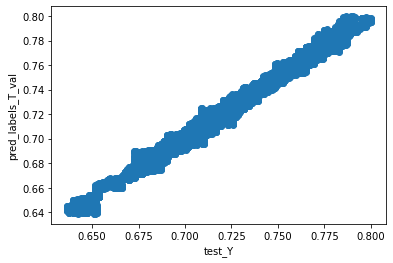

In [14]:
import matplotlib.pyplot as plt
plt.scatter(test_Y,preds_T)
plt.xlabel('test_Y')
plt.ylabel('pred_labels_T_val')